## Distancias de huida de aves de Europa frente a America-Australia

<img src="https://cdn.pixabay.com/photo/2020/05/23/19/25/eagle-5211114_960_720.png" alt="Girl in a jacket" width="500" height="600">


Las migraciones de los seres humanos han sido acompañadas de extinciones masivas de fauna allá donde se han desplazado desde que partieron de Africa. <i>Homo sapiens</i> llego a Europa hace 150.000 años aproximadamente, colonizó el continente australiano desde Eurasia hace al menos 65.000 años, y finalmente la presencia humana en America se data en hace 30.000 años. La hipótesis es que los animales que han "conocido" a los humanos más recientemente tienen distancias de iniciacion de huida (FID, flight innitiation distance) menores (es decir menos miedo), por lo tanto se esperaría que las especies de aves en Europa tuvieran las distancias mayores en comparación con aquellas de otros contientes ya que han coevolucionado más tiempo con <i>Homo sapiens</i>.

**Data source**: Livezey KB, Fernández-Juricic E, Blumstein DT. Database of bird flight initiation distances to assist in estimating effects from human disturbance and delineating buffer areas. Journal of Fish and Wildlife Management 7(1):181-191; e1944-687X. doi: 10.3996/082015-JFWM-078
http://nebula.wsimg.com/dae0dfa4f6186d775ad7fe73080fdb7f?AccessKeyId=AF775D103BAAD321910E&disposition=0&alloworigin=1

In [163]:
library(ggplot2)#graphic grammar
library(dplyr)#to organize data
library(car)#qqplots and others
library(lmtest)#test homogeneidad de varianza
library(effsize)#libreria para tamaños de efecto Cohen d

In [164]:
FID.data<-read.csv("birdFID.csv")
head(FID.data,10)
dim(FID.data)

,Continent,Disturbance,Order,Family,Scientific.name,Common.name,FID,log.fid
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,America-Australia,Pedestrian,Passeriformes,Meliphagidae,Acanthagenys rufogularis,spiny-cheeked honeyeater,9.2,0.9637878
2,America-Australia,Pedestrian,Passeriformes,Pardalotidae,Acanthiza chrysorrhoa,yellow-rumped thornbill,6.6,0.8195439
3,America-Australia,Pedestrian,Passeriformes,Pardalotidae,Acanthiza lineata,striated thornbill,4.2,0.6232493
4,America-Australia,Pedestrian,Passeriformes,Pardalotidae,Acanthiza nana,yellow thornbill,6.3,0.7993405
5,America-Australia,Pedestrian,Passeriformes,Pardalotidae,Acanthiza pusilla,brown thornbill,4.3,0.6334685
6,America-Australia,Pedestrian,Passeriformes,Pardalotidae,Acanthiza reguloides,buff-rumped thornbill,4.3,0.6334685
7,America-Australia,Pedestrian,Passeriformes,Meliphagidae,Acanthorhynchus tenuirostris,eastern spinebill,5.6,0.7481880
8,America-Australia,Pedestrian,Falconiformes,Accipitridae,Accipiter novaehollandiae,grey goshawk,24.6,1.3909351
9,America-Australia,Pedestrian,Passeriformes,Sturnidae,Acridotheres tristis,common myna,11.6,1.0644580


[1] 434   8

In [165]:
FID.data %>% 
arrange(desc(Scientific.name,Continent,10))#arrange by scientific name and continent, first 10 obs

Continent,Disturbance,Order,Family,Scientific.name,Common.name,FID,log.fid
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
America-Australia,Pedestrian,Passeriformes,Zosteropidae,Zosterops lateralis,silvereye,5.50,0.7403627
America-Australia,Pedestrian,Passeriformes,Muscicapidae,Zoothera lunulata,Bassian thrush,8.90,0.9493900
America-Australia,Pedestrian,Passeriformes,Muscicapidae,Zoothera heinei,russet-tailed thrush,11.00,1.0413927
America-Australia,Pedestrian,Passeriformes,Emberizidae,Zonotrichia leucophrys,white-crowned sparrow,8.60,0.9344985
America-Australia,Pedestrian,Columbiformes,Columbidae,Zenaida macroura,mourning dove,15.80,1.1986571
Europe,Pedestrian,Charadriiformes,Charadriidae,Vanellus vanellus,northern lapwing,41.32,1.6161603
America-Australia,Pedestrian,Charadriiformes,Charadriidae,Vanellus tricolor,banded lapwing,74.00,1.8692317
America-Australia,Pedestrian,Charadriiformes,Charadriidae,Vanellus miles,masked lapwing,79.70,1.9014583
Europe,Pedestrian,Coraciiformes,Upupidae,Upupa epops,hoopoe,19.96,1.3001605


In [166]:
# Remove duplicated rows by scientific name
FID.data %>% distinct(Scientific.name, .keep_all=TRUE)
dim(FID.data)

Continent,Disturbance,Order,Family,Scientific.name,Common.name,FID,log.fid
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
America-Australia,Pedestrian,Passeriformes,Meliphagidae,Acanthagenys rufogularis,spiny-cheeked honeyeater,9.2,0.9637878
America-Australia,Pedestrian,Passeriformes,Pardalotidae,Acanthiza chrysorrhoa,yellow-rumped thornbill,6.6,0.8195439
America-Australia,Pedestrian,Passeriformes,Pardalotidae,Acanthiza lineata,striated thornbill,4.2,0.6232493
America-Australia,Pedestrian,Passeriformes,Pardalotidae,Acanthiza nana,yellow thornbill,6.3,0.7993405
America-Australia,Pedestrian,Passeriformes,Pardalotidae,Acanthiza pusilla,brown thornbill,4.3,0.6334685
America-Australia,Pedestrian,Passeriformes,Pardalotidae,Acanthiza reguloides,buff-rumped thornbill,4.3,0.6334685
America-Australia,Pedestrian,Passeriformes,Meliphagidae,Acanthorhynchus tenuirostris,eastern spinebill,5.6,0.7481880
America-Australia,Pedestrian,Falconiformes,Accipitridae,Accipiter novaehollandiae,grey goshawk,24.6,1.3909351
America-Australia,Pedestrian,Passeriformes,Sturnidae,Acridotheres tristis,common myna,11.6,1.0644580


[1] 434   8

In [167]:
# Remove duplicated rows
FID.data %>% distinct()
dim(FID.data)

Continent,Disturbance,Order,Family,Scientific.name,Common.name,FID,log.fid
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
America-Australia,Pedestrian,Passeriformes,Meliphagidae,Acanthagenys rufogularis,spiny-cheeked honeyeater,9.2,0.9637878
America-Australia,Pedestrian,Passeriformes,Pardalotidae,Acanthiza chrysorrhoa,yellow-rumped thornbill,6.6,0.8195439
America-Australia,Pedestrian,Passeriformes,Pardalotidae,Acanthiza lineata,striated thornbill,4.2,0.6232493
America-Australia,Pedestrian,Passeriformes,Pardalotidae,Acanthiza nana,yellow thornbill,6.3,0.7993405
America-Australia,Pedestrian,Passeriformes,Pardalotidae,Acanthiza pusilla,brown thornbill,4.3,0.6334685
America-Australia,Pedestrian,Passeriformes,Pardalotidae,Acanthiza reguloides,buff-rumped thornbill,4.3,0.6334685
America-Australia,Pedestrian,Passeriformes,Meliphagidae,Acanthorhynchus tenuirostris,eastern spinebill,5.6,0.7481880
America-Australia,Pedestrian,Falconiformes,Accipitridae,Accipiter novaehollandiae,grey goshawk,24.6,1.3909351
America-Australia,Pedestrian,Passeriformes,Sturnidae,Acridotheres tristis,common myna,11.6,1.0644580


[1] 434   8

create a new database with mean FID per `Scientific.name`  the rest is the same

In [168]:
# sort the dataframe in R using arrange
FID.data %>% 
arrange(desc(FID),10)#los mas miedosos

Continent,Disturbance,Order,Family,Scientific.name,Common.name,FID,log.fid
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
America-Australia,Pedestrian,Falconiformes,Accipitridae,Aguila chrysaetos,golden eagle,225.00,2.352183
Europe,Pedestrian,Anseriformes,Anatidae,Cygnus columbianus,tundra swan,200.00,2.301030
Europe,Pedestrian,Anseriformes,Anatidae,Cygnus cygnus,whooper swan,155.00,2.190332
America-Australia,Pedestrian,Anseriformes,Anatidae,Dendrocygna eytoni,plumed whistling duck,130.00,2.113943
America-Australia,Pedestrian,Anseriformes,Anatidae,Tadorna tadornoides,Australian shelduck,122.30,2.087426
America-Australia,Pedestrian,Anseriformes,Anatidae,Anas superciliosa,Pacific black duck,107.50,2.031408
America-Australia,Pedestrian,Charadriiformes,Scolopacidae,Numenius madagascariensis,eastern curlew,97.50,1.989005
America-Australia,Pedestrian,Falconiformes,Falconidae,Falco mexicanus,prairie falcon,92.00,1.963788
America-Australia,Pedestrian,Charadriiformes,Scolopacidae,Numenius phaeopus,whimbrel,90.00,1.954243


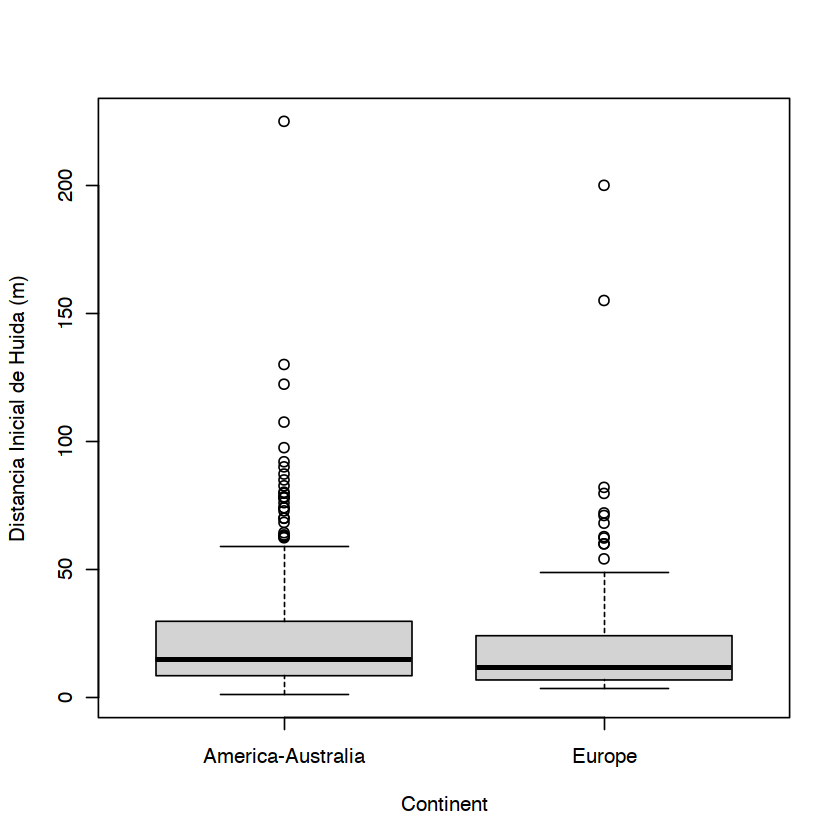

In [169]:
boxplot(FID~Continent,data=FID.data,
        axes=T,ylab="Distancia Inicial de Huida (m)")

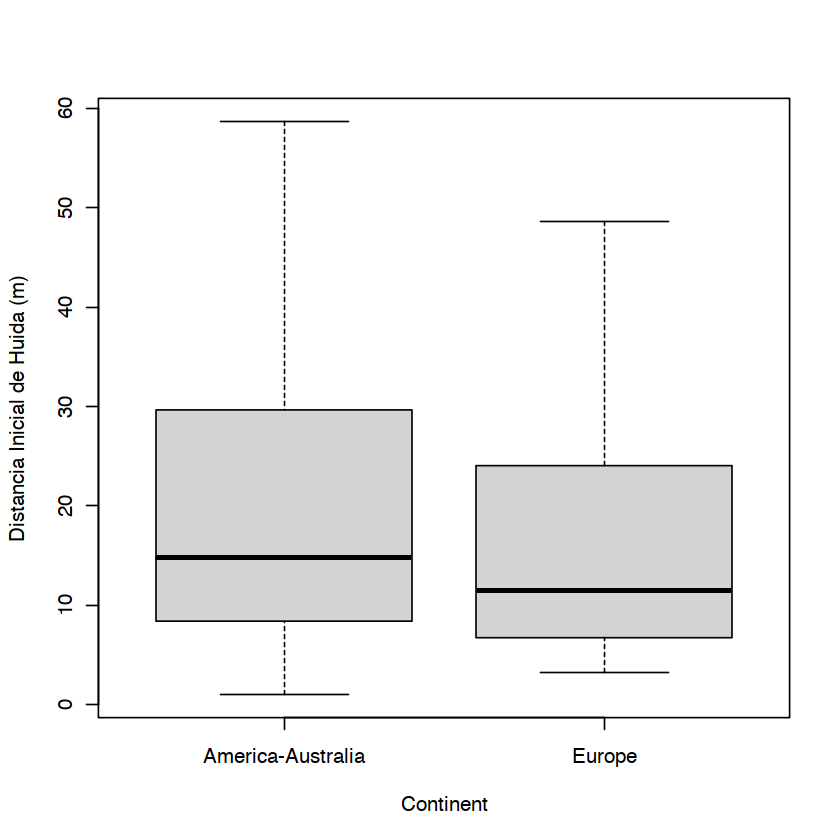

In [170]:
boxplot(FID~Continent,data=FID.data,
        axes=T,outline=F,ylab="Distancia Inicial de Huida (m)")

Warning message:
“Removed 54 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 54 rows containing non-finite values (stat_summary).”


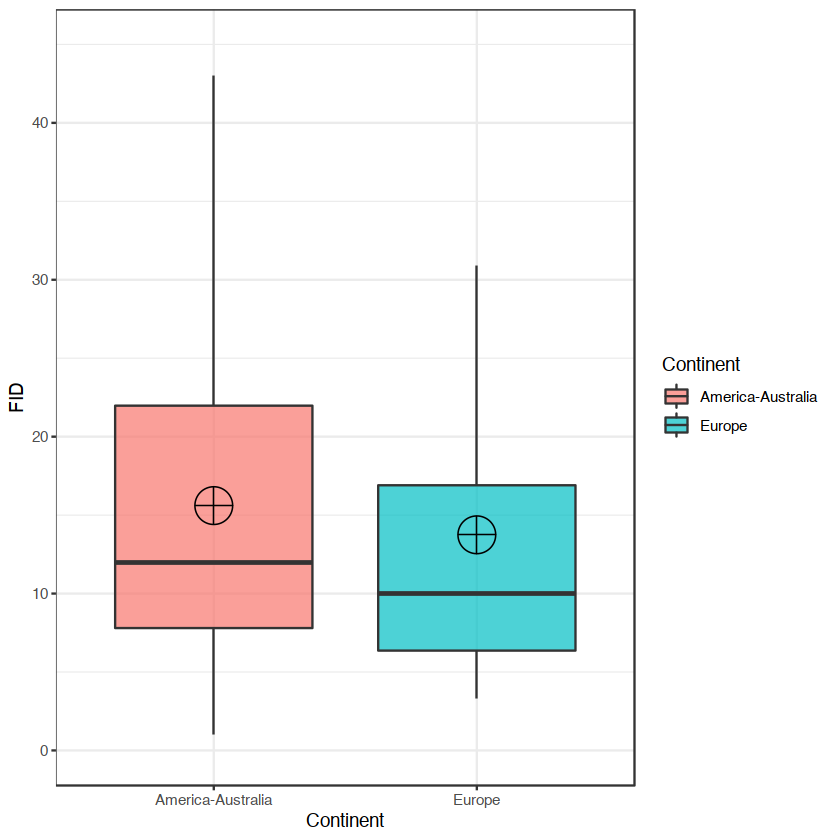

In [171]:
ggplot(FID.data, aes(x=Continent, y=FID, fill=Continent)) +
    geom_boxplot(alpha=0.7,outlier.shape=NA) +
    stat_summary(fun=mean, geom="point", shape=10, size=10, color="black", fill="red") +
    theme(legend.position="none")+
  ylim(0,45)+theme_bw()#la cruz indica la media

**Supuestos estadísticos**

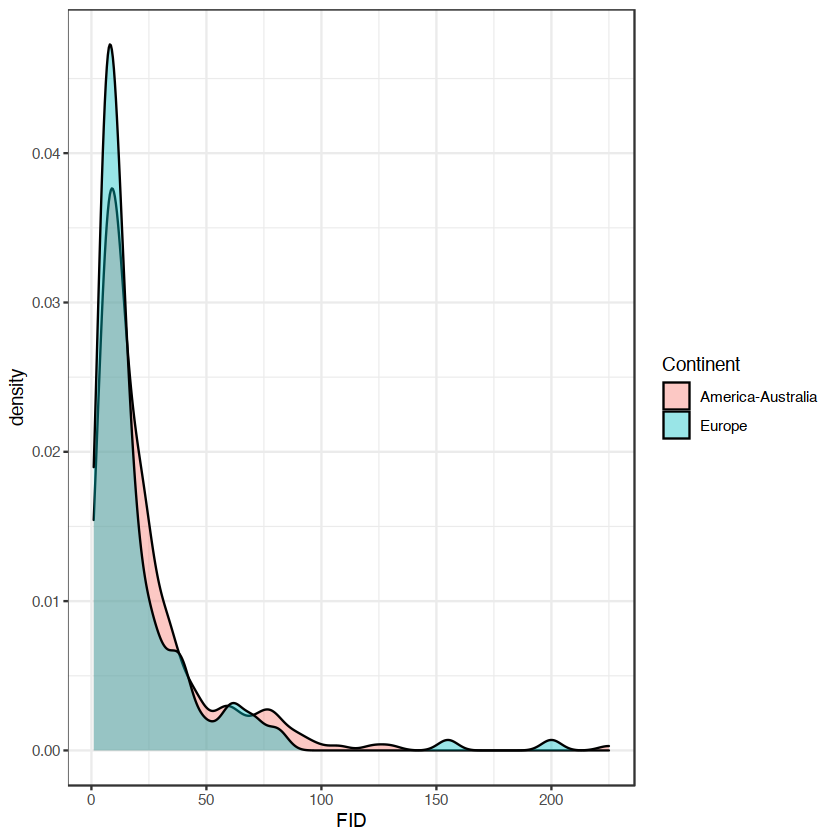

In [172]:
#normalidad
ggplot(FID.data,aes(x=FID,fill=Continent))+
  geom_density(alpha=0.4)+theme_bw()
#los FID no son normales para ningun grupo como se ve claramente en esta figura de densidad de FID
#asimetria positiva, hay muchas distancias concentradas entre 0 y 20m

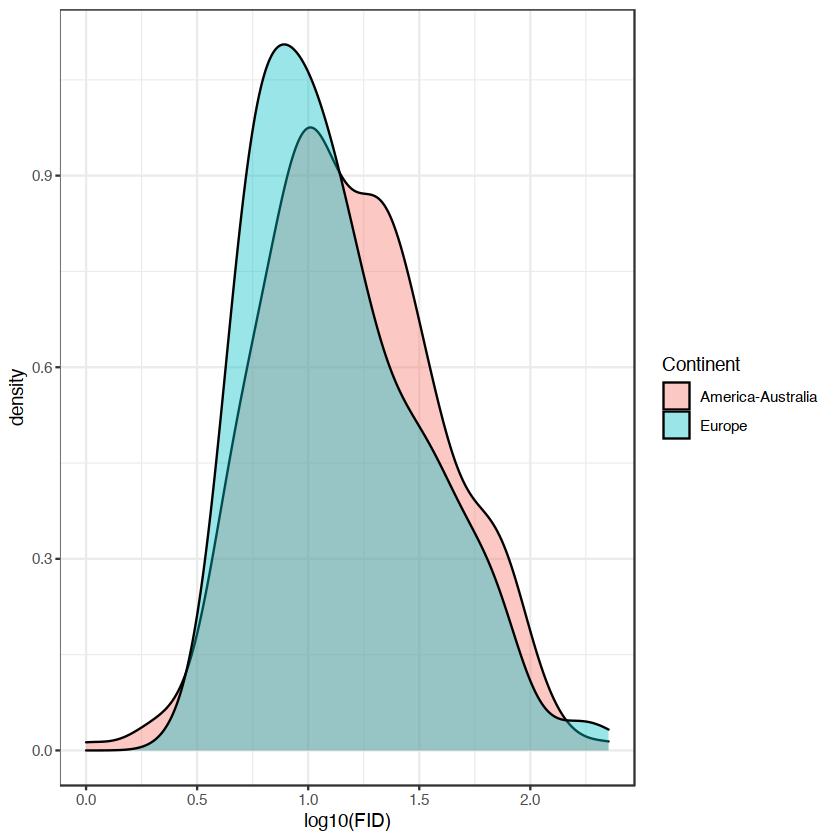

In [173]:
#transformando los datos a logaritmos en base 10
ggplot(FID.data,aes(x=log10(FID),fill=Continent))+
  geom_density(alpha=0.4)+theme_bw()
#las FID se normalizan, pero el qqplot abajo deja claramente que siguen sin ser normales

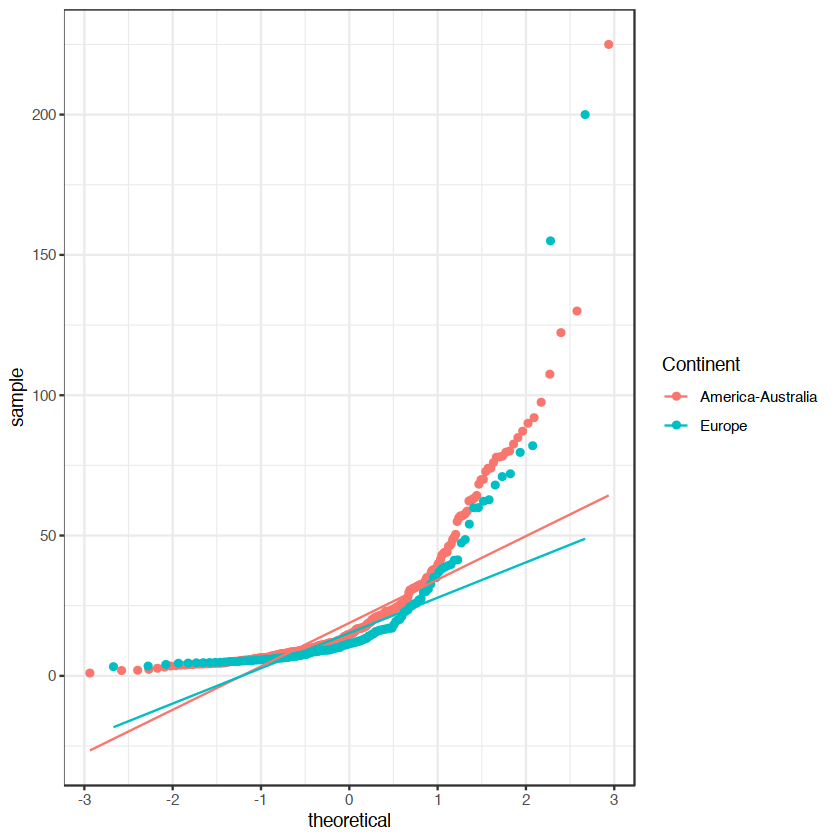

In [174]:
ggplot(FID.data, aes(sample = FID,color=Continent))+stat_qq() + stat_qq_line() + theme_bw()#no es necesario hacer
#un ks test

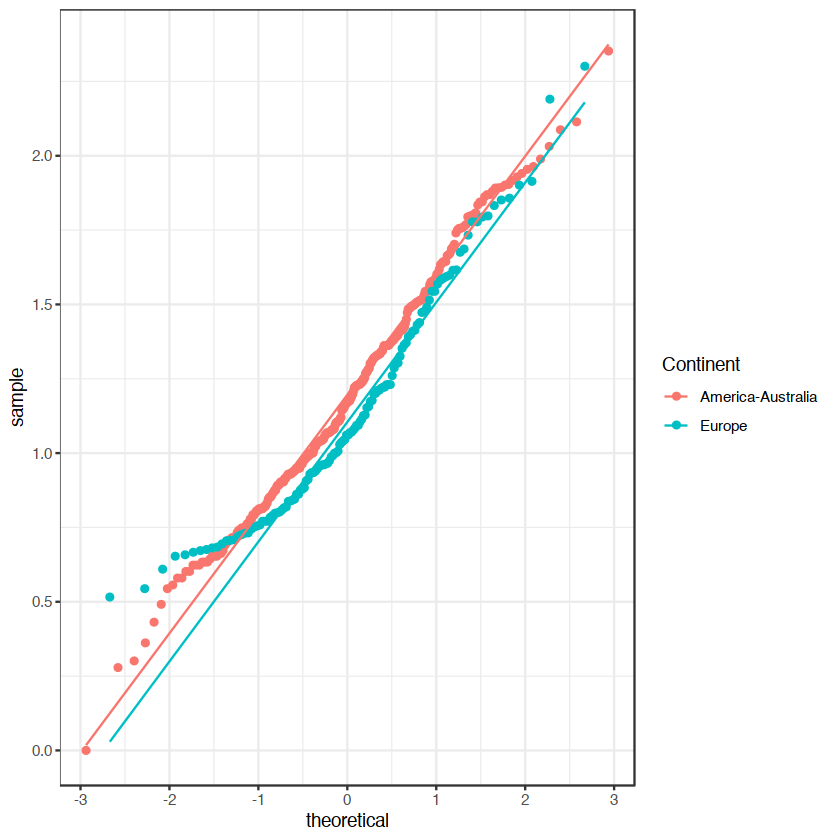

In [175]:
ggplot(FID.data, aes(sample = log10(FID),color=Continent))+stat_qq() + stat_qq_line() + theme_bw()

In [176]:
leveneTest(log.fid~as.factor(Continent),data=FID.data)#no hay homogeneidad de varianza entre grupos

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.6086272,0.4357324
,432,NA,NA


In [177]:
dwtest(log.fid~Continent,data=FID.data)#tampoco hay indepencia de observaciones


	Durbin-Watson test

data:  log.fid ~ Continent
DW = 1.3962, p-value = 1.062e-10
alternative hypothesis: true autocorrelation is greater than 0


Necesitamos un análisis no paramétrico (Wilcoxon Rank Sum) para comparar los dos grupos

In [178]:
(mu.test<-wilcox.test(FID~Continent,data=FID.data))


	Wilcoxon rank sum test with continuity correction

data:  FID by Continent
W = 22327, p-value = 0.04638
alternative hypothesis: true location shift is not equal to 0


In [179]:
FID.data%>%
  group_by(Continent)%>%
  summarise(mean=mean(FID),median=median(FID),min=min(FID),
            max=max(FID),std=sd(FID),
            len=length(FID))

,Continent,mean,median,min,max,std,len
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,America-Australia,23.54103,14.8,1.00,225,25.11240,302
2,Europe,20.78947,11.5,3.28,200,26.35604,132


In [180]:
Zstat<-qnorm(mu.test$p.value/2)

In [181]:
abs(Zstat)/sqrt(302+132)#tamano de efecto muy pequeno:

[1] 0.0956159

**Interpretación estadística** La FID presentada por las especies de aves en Europa (mediana = 11.5 metros) es menor que el presentado en las especies en America y Australia (mediana = 14.8), esta diferencia en metros fue altamente significativa (W = 163098, p <0.001, n1 = 302, n2 = 132). Sin embargo, el tamaño del efecto correspondiente a esta diferencia es muy pequeño (0.09). Por lo tando, los resultados del análisis no indican que la hipótesis se pueda defender, es decir no existe evidencia de que existan diferencias claras entre los dos grupos de continentes.

In [182]:
FID.data%>%
  group_by(Continent,Order)%>%
  summarise(mean=mean(FID),median=median(FID),min=min(FID),
            max=max(FID),std=sd(FID),
            len=length(FID))%>%
arrange(desc(mean),20)

`summarise()` has grouped output by 'Continent'. You can override using the `.groups` argument.



Continent,Order,mean,median,min,max,std,len
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Europe,Anseriformes,79.496667,43.90,10.68,200.00,78.321172,6
America-Australia,Anseriformes,69.346667,78.00,12.80,130.00,36.126284,15
America-Australia,Struthioniformes,58.700000,58.70,58.70,58.70,NA,1
America-Australia,Falconiformes,57.723077,43.40,18.00,225.00,55.145250,13
Europe,Charadriiformes,46.932308,41.32,9.00,82.00,23.503959,13
America-Australia,Pelicaniformes,45.394444,38.00,24.00,77.90,20.053825,9
Europe,Ciconiiformes,39.120000,35.00,35.00,47.36,7.136049,3
Europe,Apodiformes,38.100000,38.10,38.10,38.10,NA,1
America-Australia,Ciconiiformes,36.390000,31.70,10.00,84.90,19.948803,23


Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”


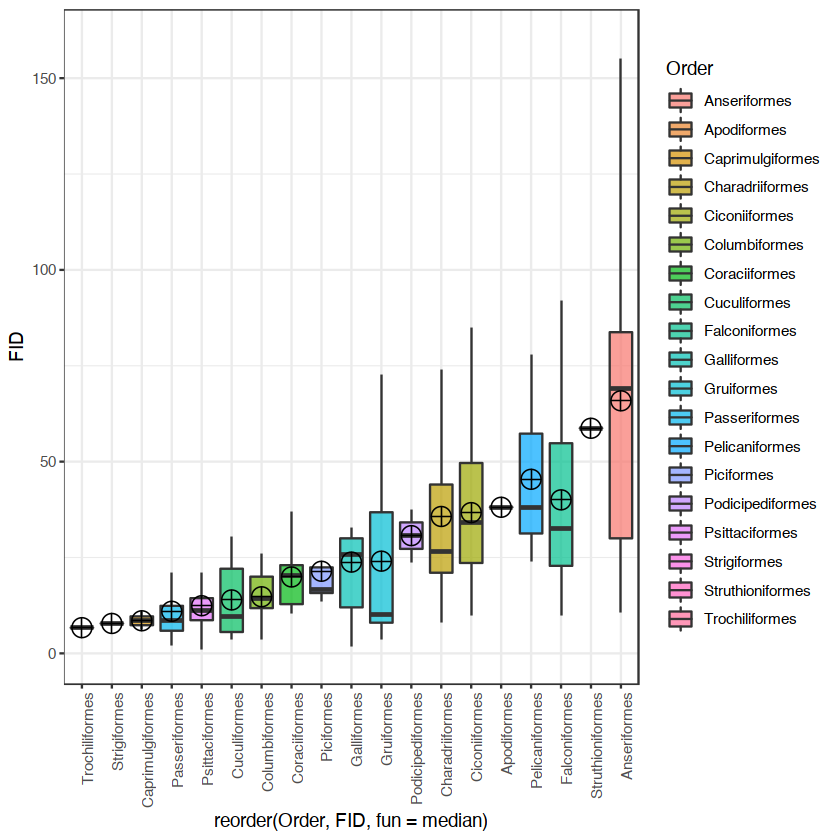

In [183]:
ggplot(FID.data, aes(x = reorder(Order,FID,fun=median), y=FID, fill=Order)) +
    geom_boxplot(alpha=0.7,outlier.shape=NA) +
    stat_summary(fun=mean, geom="point", shape=10, size=5, color="black", fill="red") +
    theme(legend.position="none")+
  ylim(0,160)+theme_bw()+ theme(axis.text.x=element_text(angle=90, hjust=1))#la cruz indica la media